<a href="https://colab.research.google.com/github/ankur-357/AKTVLOG/blob/main/SPORFpostOperative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install build-essential cmake python3-dev libomp-dev libeigen3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libeigen3-dev is already the newest version (3.4.0-2ubuntu2).
libomp-dev is already the newest version (1:14.0-55~exp2).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
python3-dev is already the newest version (3.10.6-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!sudo apt install pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'python3-pip' instead of 'pip'
python3-pip is already the newest version (22.0.2+dfsg-1ubuntu0.4).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!pip install -e "git+https://github.com/neurodata/RerF.git@staging#egg=rerf&subdirectory=Python"

Obtaining rerf from git+https://github.com/neurodata/RerF.git@staging#egg=rerf&subdirectory=Python
  Cloning https://github.com/neurodata/RerF.git (to revision staging) to ./src/rerf
  Running command git clone --filter=blob:none --quiet https://github.com/neurodata/RerF.git /content/RerF/Python/src/rerf
  Resolved https://github.com/neurodata/RerF.git to commit a7a3c7e6df457b722de86d7254f8a7724b27978f
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Attempting uninstall: rerf
    Found existing installation: rerf 2.0.5
    Uninstalling rerf-2.0.5:
      Successfully uninstalled rerf-2.0.5
  Running setup.py develop for rerf


In [ ]:
!pip install pyfp


In [ ]:
!pip install rerf

In [ ]:
!pip install pyforest

In [ ]:
!git clone https://github.com/neurodata/RerF.git

Cloning into 'RerF'...
remote: Enumerating objects: 9099, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 9099 (delta 46), reused 93 (delta 32), pack-reused 8974
Receiving objects: 100% (9099/9099), 111.07 MiB | 21.05 MiB/s, done.
Resolving deltas: 100% (5103/5103), done.


In [ ]:
cd RerF/Python

/content/RerF/Python/RerF/Python


In [ ]:

!python setup.py clean --all

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running clean
'build/lib.linux-x86_64-cpython-310' does not exist -- can't clean it
'build/bdist.linux-x86_64' does not exist -- can't clean it
'build/scripts-3.10' does not exist -- can't clean it


In [ ]:
!pip install -e .

Obtaining file:///content/RerF/Python/RerF/Python
  Preparing metadata (setup.py) ... done
  Attempting uninstall: rerf
    Found existing installation: rerf 2.0.5
    Uninstalling rerf-2.0.5:
      Successfully uninstalled rerf-2.0.5
  Running setup.py develop for rerf


In [ ]:
"""
Example usage of RerF module.

Paths to dataset are relative from "Python" source directory.
"""

from multiprocessing import cpu_count

import numpy as np

from rerf.RerF import fastPredict, fastPredictPost, fastRerF

datatype = "iris"
# datatype = "mnist"

if datatype == "iris":
    datafile = "../packedForest/res/iris.csv"
    label_col = 4
elif datatype == "mnist":
    datafile = "../packedForest/res/mnist.csv"
    label_col = 0

print("loading data...")
X = np.genfromtxt(datafile, delimiter=",")
print("data loaded")

if datatype == "iris":
    feat_data = X[:, 0:4]  # iris
elif datatype == "mnist":
    feat_data = X[:, 1:]  # mnist

labels = X[:, label_col]

# forest = fastRerF(
#     CSVFile=datafile,
#     Ycolumn=label_col,
#     forestType="binnedBaseRerF",
#     trees=500,
#     numCores=cpu_count(),
# )
forest = fastRerF(
    X=feat_data, Y=labels, forestType="binnedBaseRerF", trees=500, numCores=cpu_count()
)

forest.printParameters()

# training predictions
predictions = fastPredict(feat_data, forest)
# print(predictions)

# training posterior predictions probabilities
post_pred = fastPredictPost(feat_data, forest)
# print(post_pred)

print("Error rate", np.mean(predictions != labels))

print("loading test data...")

if datatype == "iris":
    data_fname = "../packedForest/res/iris.csv"  # iris
elif datatype == "mnist":
    data_fname = "../packedForest/res/mnist_test.csv"  # mnist
test_X = np.genfromtxt(data_fname, delimiter=",")

print("data loaded")

if datatype == "iris":
    test_data = test_X[:, 0:4]  # iris
elif datatype == "mnist":
    test_data = test_X[:, 1:]  # mnist

test_pred = fastPredict(test_data, forest)

print("Error rate", np.mean(test_pred != test_X[:, label_col]))


loading data...
data loaded
numTreesInForest -> 500
maxDepth -> 2147483647
minParent -> 1
numClasses -> 3
numObservations -> 150
numFeatures -> 4
mtry -> 2
mtryMult -> 1.5
fractionOfFeaturesToTest -> -1
CSV file name -> 
columnWithY -> -1
Type of Forest -> binnedBaseRerF
binSize -> 0
binMin -> 0
numCores -> 2
seed -> 649138
numTreeBins -> 2
Error rate 0.0
loading test data...
data loaded
Error rate 0.0


In [ ]:
"""
Example shows usage of rerfClassifier class.

Based on https://www.datacamp.com/community/tutorials/random-forests-classifier-python
with rerfClassifier swapped out instead of sklearn's RandomForestClassifier
"""

from rerf.rerfClassifier import rerfClassifier

# Import scikit-learn dataset library
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()


# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

# Creating a DataFrame of given iris dataset.
import pandas as pd

data = pd.DataFrame(
    {
        "sepal length": iris.data[:, 0],
        "sepal width": iris.data[:, 1],
        "petal length": iris.data[:, 2],
        "petal width": iris.data[:, 3],
        "species": iris.target,
    }
)
print(data.head())

# Import train_test_split function
from sklearn.model_selection import train_test_split

X = data[["sepal length", "sepal width", "petal length", "petal width"]]  # Features
y = data["species"]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)  # 70% training and 30% test


# Create a Gaussian Classifier
clf = rerfClassifier(n_estimators=100)

print(clf)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
rerfClassifier(n_estimators=100)
Accuracy: 0.9333333333333333


0.7531771271755628


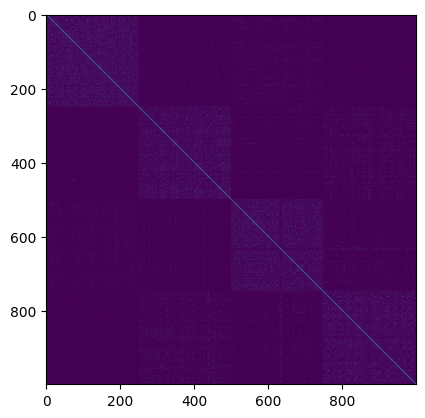

In [ ]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.metrics import adjusted_rand_score
from rerf.urerf import UnsupervisedRandomForest
X, y = make_classification(
   n_samples=1000,
   n_features=4,
   n_informative=2,
   n_redundant=0,
   random_state=0,
   shuffle=False,
)
clf = UnsupervisedRandomForest(n_estimators=100, random_state=0)
clf.fit(X)
sim_mat = clf.transform()
plt.imshow(sim_mat)
cluster = AgglomerativeClustering(n_clusters=2)
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(y, predict_labels)
print(score)

In [ ]:
from rerf.rerfClassifier import rerfClassifier
from sklearn.datasets import make_classification
X, y = make_classification(
   n_samples=1000,
   n_features=4,
   n_informative=2,
   n_redundant=0,
   random_state=0,
   shuffle=False,
)
clf = rerfClassifier(n_estimators=100, max_depth=3, random_state=0)
clf.fit(X, y)

rerfClassifier(feature_combinations=1.5, max_depth=2, max_features='auto',
            min_samples_split=1, n_estimators=100, n_jobs=None,
            projection_matrix='RerF', random_state=0)
print(clf.predict([[0, 0, 0, 0]]))
print(clf.predict_proba([[0, 0, 0, 0]]))

[1]
[[0.26 0.74]]


In [ ]:
import numpy as mp
import pandas as pd

# Specify the correct file path and header argument
data = pd.read_csv("/content/post-operative-data.csv")


In [ ]:
data.head()

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
0,mid,low,excellent,mid,stable,stable,stable,15.0,A
1,mid,high,excellent,high,stable,stable,stable,10.0,S
2,high,low,excellent,high,stable,stable,mod-stable,10.0,A
3,mid,low,good,high,stable,unstable,mod-stable,15.0,A
4,mid,mid,excellent,high,stable,stable,stable,10.0,A


In [ ]:
data.shape

(90, 9)

In [ ]:
data.columns

Index(['L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL',
       'COMFORT', 'decision ADM-DECS'],
      dtype='object')

In [ ]:
data.isnull().sum()

L-CORE               0
L-SURF               0
L-O2                 0
L-BP                 0
SURF-STBL            0
CORE-STBL            0
BP-STBL              0
COMFORT              3
decision ADM-DECS    0
dtype: int64

In [ ]:
# Assuming y_train is a pandas Series or DataFrame
data.replace("'?'", np.nan, inplace=True)
data.replace("?", np.nan, inplace=True)
data = data.fillna(y_train.mean())

In [ ]:
# from sklearn.preprocessing import LabelEncoder for performing Label Encoding
from sklearn.preprocessing import LabelEncoder
# Apply LabelEncoder
le = LabelEncoder()
data["L-CORE"] = le.fit_transform(data["L-CORE"])
data["L-SURF"] = le.fit_transform(data["L-SURF"])
data["L-O2"] = le.fit_transform(data["L-O2"])
data["L-BP"] = le.fit_transform(data["L-BP"])
data["SURF-STBL"] = le.fit_transform(data["SURF-STBL"])
data["CORE-STBL"] = le.fit_transform(data["CORE-STBL"])
data["BP-STBL"] = le.fit_transform(data["BP-STBL"])


In [ ]:
data.sample(5)

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,decision ADM-DECS
33,2,1,1,2,0,1,1,10.0,A
35,2,2,1,2,0,1,1,10.0,A
4,2,2,0,0,0,1,1,10.0,A
77,2,2,0,2,0,1,2,10.0,A
86,2,2,0,2,1,1,1,15.0,S


In [ ]:
# Using data.iloc[:,:-1].values we get the feature variables
X=data.iloc[:,1:-1].values

# Using data.iloc[:,-1].values we get the target variable
y=data.iloc[:,-1].values


In [ ]:
X.shape

(90, 7)

In [ ]:
y.shape

(90,)

In [ ]:
# from sklearn.preprocessing import LabelEncoder for performing Label Encoding
from sklearn.preprocessing import LabelEncoder
# Apply LabelEncoder
lbl = LabelEncoder()
y_train_new = lbl.fit_transform(y)
classes = lbl.classes_

In [ ]:
# Use the value_counts() function to get the counts of unique values
counts = data["decision ADM-DECS"].value_counts()

# Print the result
print(counts)

A    64
S    24
I     2
Name: decision ADM-DECS, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_train_new, test_size=0.30, stratify = y)

In [ ]:
from rerf.rerfClassifier import rerfClassifier
clf = rerfClassifier(n_estimators=300, max_features=8, n_jobs = 2, random_state = 0)

In [ ]:
print(X_train.shape)

(63, 7)


In [ ]:
print(y_train.shape)

(63,)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
# Train the model using the training sets y_pred=clf.predict(X_test)
from time import time
# Measure training time
start_time = time()

clf.fit(X_train, y_train)
training_time = time() - start_time
print("Training time:", training_time)

# Measure testing time
start_time = time()

y_pred = clf.predict(X_test)

testing_time = time() - start_time
print("Testing time:", testing_time)

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred_poba = clf.predict_proba(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted"))
print("Recall:", recall_score(y_test, y_pred, average="weighted"))
print("F1-Score:", f1_score(y_test, y_pred, average="weighted"))
# Generate and print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(y_test.shape)
print(y_pred_poba.shape)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_poba, multi_class="ovr"))  # Assuming multi-class classification

Training time: 0.13086462020874023
Testing time: 0.03126263618469238
Accuracy: 0.6666666666666666
Precision: 0.5848765432098766
Recall: 0.6666666666666666
F1-Score: 0.6082687338501293
Confusion Matrix:
 [[17  0  2]
 [ 1  0  0]
 [ 6  0  1]]
(27,)
(27, 3)
ROC AUC Score: 0.5409653942548679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


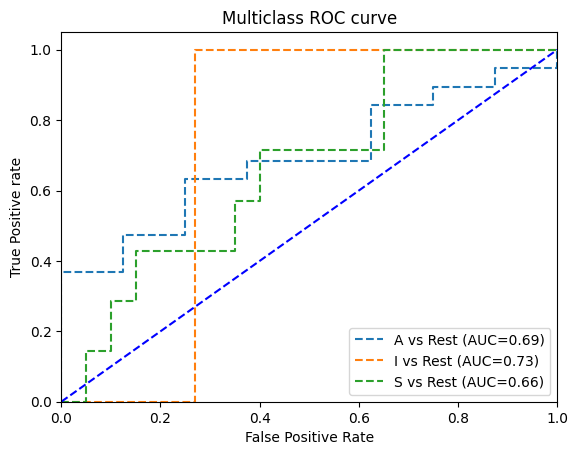

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

#Random Forest Classifier
#because we are dealing with multiclass data and so, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(rerfClassifier(n_estimators=300, max_features=8, n_jobs = 2, random_state = 50))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()


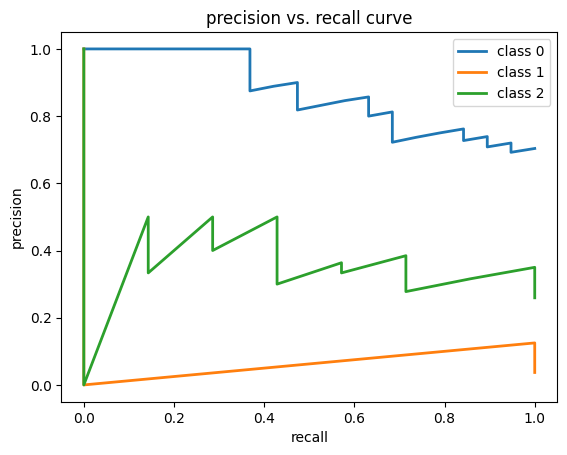

In [ ]:
# precision recall curve
from sklearn.metrics import precision_recall_curve
precision = dict()
recall = dict()
for i in range(n_class):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:,i], pred_prob[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()